ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **14Oct20**

# Laboratory Work 07 (15Oct20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|        Context            |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (20pts)](#a1) Solution of $\overset{(100 \times 100)}{\Amtrx}\,\xvec = \bvec$.
 - [1.1)](#a11) Import image as matrix.
 - [1.2)](#a12) Compute solution and explain.
* [Assignment 2 (25pts)](#a2) Matrix inverse.
 - [2.1)](#a21) Compute inverse.
 - [2.2)](#a22) Demonstrate correctness.
 - [2.3)](#a23) Plot $\Amtrx$, $\Amtrx^{-1}$ and $\Amtrx^{-1}\Amtrx$.
* [Assignment 3 (25pts)](#a3) 
 - [3.1)](#a31) Solution of $\overset{(100 \times 50)}{\Amtrx}\,\xvec = \bvec$.
 - [3.2)](#a32) Solution of $\overset{(50 \times 100)}{\Amtrx}\,\xvec = \bvec$.
* [Assignment 4 (25pts)](#a4) Stoichiometry
 - [4.1)](#a41) Compute rank(S).
 - [4.2)](#a42) Compute given matrix equation.
* [Assignment 5 (5pts)](#a5) 

 ---

## <span style="color:blue">[Assignment 1 (20 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa) Import the following image URL: 
        
 + https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png
</span>
<br>

### <span style="color:blue">as a matrix $\Amtrx$ (need internet connection) and plot.</span><a id="a11"></a>

In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def LUPQdecomposition(matrix):
    m,n = matrix.shape
    P = np.identity(m)
    L = np.identity(m)
    Q = np.identity(n)
    U = matrix.copy()
    for k in range(0, n - 1):
        max_magnitude_value = np.max(np.abs(U[k:,k]))
        pivot_candidates = np.abs(np.copy(U[:,k]))
        pivot_candidates[:k] = 0
        (row_ids,) = np.where(pivot_candidates == max_magnitude_value)
        pivot_row_id = max(k,row_ids[0])
        pivot_col_id = k
        pivot = U[pivot_row_id,pivot_col_id]


        #row permutation matrix

        p_k = np.eye(m)
        save = p_k[k, :].copy()
        p_k[k, :] = p_k[pivot_row_id, :]
        p_k[pivot_row_id, :] = save

        P = p_k@P
        U = p_k@U

        #column permutation matrix

        q_k = np.eye(n)
        save1 = q_k[:,k].copy()
        q_k[:,k] = q_k[:,pivot_col_id]
        q_k[:,pivot_col_id] = save1

        Q = Q@q_k
        U = U@q_k

        for i in range(k+1,m-1):
            if U[i,k] != 0.0:
                multiplier = U[i,k]/pivot
                L[i,k] = multiplier
                for j in range(k,n-1):
                    U[i,j] -= U[k,j]*multiplier

        L[:,:k] = p_k@L[:,:k]

    rank = np.linalg.matrix_rank(U)


    return(P,L,U,Q,rank)

def forward_solve(l_mtrx, b_vec, loop_option='use-dot-product'):

    # sanity test
    assert isinstance(l_mtrx,np.ndarray)      # l_mtrx must be np.ndarray
    assert l_mtrx.shape[0] == l_mtrx.shape[1],'non-square matrix.' # l_mtrx must be square
    assert np.all(np.abs(np.diagonal(l_mtrx)) > 0.0),'zero value on diagonal.'
    rows_ids, cols_ids = np.where(np.abs(l_mtrx) > 0) # get i, j of non zero entries
    assert b_vec.shape[0] == l_mtrx.shape[0],'incompatible l_mtrx @ b_vec dimensions'  # b_vec must be compatible to l_mtrx
    assert loop_option == 'use-dot-product' or loop_option == 'use-double-loop'
    # end of sanity test

    m_rows = l_mtrx.shape[0]
    n_cols = m_rows
    x_vec = np.zeros(n_cols)

    if loop_option == 'use-dot-product':

        for i in range(m_rows):
            sum_lx = np.dot( l_mtrx[i,:i], x_vec[:i] )
            #sum_lx = l_mtrx[i,:i] @ x_vec[:i] # matrix-vec mult. alternative to dot product
            x_vec[i] = b_vec[i] - sum_lx
            x_vec[i] /= l_mtrx[i,i]

    elif loop_option == 'use-double-loop':

        for i in range(m_rows):
            sum_lx = 0.0
            for j in range(i):
                sum_lx += l_mtrx[i,j] * x_vec[j]
            x_vec[i] = b_vec[i] - sum_lx
            x_vec[i] /= l_mtrx[i,i]

    else:
        assert False, 'not allowed option: %r'%loop_option

    return x_vec

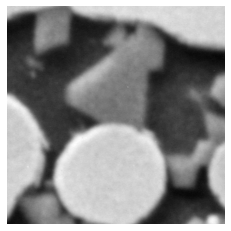

In [22]:
'''1.1) Import matrix and show image'''

block=plt.imread('images/cermet.png',format='png')
A_mtrx=np.array(block)
plt.imshow( A_mtrx,  cmap='gray' ) 
plt.axis('off')
plt.show()

### <span style="color:blue">[1.2)](#toa) Compute the solution
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(100 \times 100)}{\Amtrx}\,\xvec = \bvec, 
\end{equation*}
</span>
    
### <span style="color:blue">where $\bvec$ is a random vector. Use your algorithms. Explain why there is a solution if $\bvec$ is random. Verify that your solution method is correct; explain.</span><a id="a12"></a>

In [42]:
b_vec=np.random.random(100)
matrix=A_mtrx[0:100,0:100]
P,L,U,Q,rank=LUPQdecomposition(matrix)
(x_vec)=forward_solve(L,b_vec)
check=matrix@x_vec
res_vec = b_vec - check

print('b - A x =',res_vec)
print('||b - A x|| =',np.linalg.norm( res_vec ))

b - A x = [-29.82922305 -28.35272998 -27.73160507 -27.66618128 -26.64211507
 -25.972836   -25.12317748 -23.65447414 -23.62965191 -22.15258022
 -21.92931094 -20.95936283 -19.68304896 -18.599463   -18.74974432
 -17.8383523  -17.1921062  -17.03136153 -16.03303018 -15.75734268
 -15.51545029 -14.65580111 -14.69403665 -14.21618108 -14.41183576
 -13.76943003 -14.24589357 -13.8900313  -13.2706707  -14.20425915
 -13.89763237 -13.78414211 -13.11127998 -13.75937794 -13.32541991
 -13.74461239 -13.0589712  -13.29640943 -13.76391515 -13.19530799
 -13.13642941 -13.5548544  -13.55179807 -13.30317095 -14.13641766
 -14.29869883 -14.57704871 -13.90574252 -14.26608384 -14.02852397
 -14.21235739 -14.63528697 -14.4648322  -14.33628001 -14.75609521
 -14.59760739 -14.82188067 -14.55072365 -14.30155181 -14.184051
 -14.83285418 -14.1033677  -14.59987096 -14.50769015 -14.51012713
 -14.2150309  -15.11470199 -14.20596992 -14.28525617 -14.99902303
 -14.41790935 -14.62783802 -15.25091762 -14.50079697 -14.75978941
 -

In [3]:
'''1.2) Code for A x = b'''
import numpy.linalg as linalg

b_vec=np.random.random(100)
A=A_mtrx[0:100,0:100]
x_vec = np.linalg.solve( A, b_vec )

In [4]:
'''1.2) Code for A x = b correctness'''
check=A@x_vec
res_vec = b_vec - check

print('b - A x =',res_vec)
print('||b - A x|| =',np.linalg.norm( res_vec ))

b - A x = [ 9.89208715e-14 -7.54951657e-15  7.16093851e-14 -8.54871729e-15
 -4.08562073e-14 -5.79536419e-14  2.22044605e-14  3.81916720e-14
 -6.47260023e-14 -6.99440506e-15  4.99600361e-14  5.52891066e-14
 -3.23074900e-14  2.33146835e-14  4.61852778e-14  5.29576383e-14
 -3.33066907e-16  6.33937347e-14  3.96349620e-14 -4.74065232e-14
  1.94289029e-14 -1.33226763e-14  1.18127730e-13 -9.76996262e-14
 -2.20934382e-14 -1.44106949e-13 -1.56097357e-13 -3.18634008e-14
  2.12052598e-14  3.60822483e-14 -2.46469511e-14 -1.19015908e-13
 -9.72555370e-14 -1.01030295e-14  9.59232693e-14  1.33226763e-15
 -8.10462808e-15  9.58122470e-14 -1.76525461e-14  9.75886039e-14
  2.55351296e-15  6.51700915e-14  3.10862447e-14 -2.27595720e-14
  2.62012634e-14  5.49560397e-14  3.46389584e-14 -5.83977311e-14
  1.64313008e-14 -1.19459997e-13 -2.29816166e-14  3.66373598e-15
 -9.98090499e-14  5.36237721e-14  0.00000000e+00 -4.36317649e-14
  1.48769885e-14  9.80326931e-14 -4.03010958e-14 -3.78586051e-14
  8.91509089e-1

**Explanation:** I attempted to solve for the x vector using my previous factorization code and was unable to come up with an answer that made sense. To at least get an answer, the built in Linalg function was used. I had checked the rank of A and found an answer of 100. Because this is a square matrix and the rank of A is equal to its dimensions, solving will give a unique solution for any b vector used.

## <span style="color:blue">[Assignment 2 (25 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa) Using your algorithms, compute the matrix: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(50 \times 50)}{\Amtrx^{-1}}
\end{equation*}
</span><a id="a21"></a>

In [48]:
'''2.1) Code to invert A'''
A=A_mtrx[0:50,0:50]
A_inv=linalg.inv(A)

### <span style="color:blue">[2.2)](#toa) Demonstrate your computed $\overset{(50 \times 50)}{\Amtrx^{-1}}$ is correct and explain.</span><a id="a22"></a>

In [49]:
'''2.3) Code for correctness'''
I=np.eye(50)
check=A_inv@A
check1=I-check
print(check1)

[[ 5.28097153e-05  3.78748405e-06  2.63536890e-06 ... -3.64096413e-05
   0.00000000e+00  0.00000000e+00]
 [-4.67666650e-05  2.44379044e-05 -3.55295947e-06 ...  2.54469669e-05
  -9.15527344e-05 -6.10351562e-05]
 [ 1.45898393e-05  9.22456638e-06  1.80602074e-05 ...  1.91900363e-05
   9.15527344e-05  3.05175781e-05]
 ...
 [-9.98416181e-06 -1.30833987e-05 -1.30838080e-05 ... -1.90734863e-06
   3.05175781e-05  0.00000000e+00]
 [ 1.06811523e-04 -1.52587891e-05  1.52587891e-05 ...  1.52587891e-05
   0.00000000e+00  7.62939453e-05]
 [-1.90734863e-06 -1.90734863e-06  1.90734863e-06 ...  3.81469727e-06
   7.62939453e-06  0.00000000e+00]]


**Explanation:** When a matrix is multiplied by its inverse, this should give us the identity matrix. To check if the inverse was found correctly, the A matrix could be multiplied by its inverse. This value could then be subtracted from the identity matrix, and values of zero should be returned. Above we see that each value is zero or almost zero.

### <span style="color:blue">[2.3)](#toa) Make a plot of $\overset{(50 \times 50)}{\Amtrx}$, $\overset{(50 \times 50)}{\Amtrx^{-1}}$, and the product $\overset{(50 \times 50)}{\Amtrx^{-1}}\,  \overset{(50 \times 50)}{\Amtrx}$. Explain the plots; in particular the rightmost one.</span><a id="a23"></a>

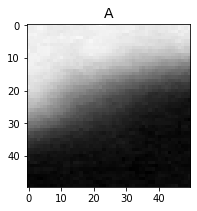

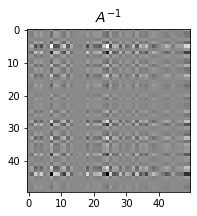

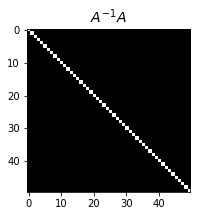

In [52]:
'''2.3) Code for plotting'''
plt.rcParams['figure.figsize'] = [3, 3]
plt.imshow( A,  cmap='gray' ) 
plt.title('A',fontsize=14)
plt.show()
plt.imshow( A_inv,  cmap='gray' )
plt.title(r'$A^{-1}$',fontsize=14)
plt.show()
plt.imshow( check,  cmap='gray' ) 
plt.title(r'$A^{-1}A$',fontsize=14)
plt.show()

**Explanation:** The first plot of A returns the upper left section of the original matrix it was sliced from. Matrix A was then run through a function that produced the inverse matrix, which we can see plotted in the second plot. The final plot was found by multiplying the original A matrix by its inverse. As we have learned, a matrix multiplied by its inverse produces the identity matrix. This can be seen in the last plot produced.

## <span style="color:blue">[Assignment 3 (25 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa) Using your algorithms, what can you say about the solution of: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(100 \times 50)}{\Amtrx}\,\xvec = \bvec.
\end{equation*}
</span>
    
### <span style="color:blue">Explain.</span><a id="a31"></a>

In [7]:
'''3.1) Code for A x = b'''
A=A_mtrx[:100,:50]
b_vec=np.random.random(100)
x_vec = np.linalg.solve( A, b_vec )

LinAlgError: Last 2 dimensions of the array must be square

**Explanation:**

### <span style="color:blue">[3.2)](#toa) Using your algorithms, what can you say about the solution of: 
    
<br>
<span style="color:blue">
\begin{equation*}
\overset{(50 \times 100)}{\Amtrx}\,\xvec = \bvec.
\end{equation*}
</span>
    
### <span style="color:blue">Explain.</span><a id="a32"></a>

In [8]:
'''3.2) Code for A x = b'''
A=A_mtrx[:50,:100]
b_vec=np.random.random(100)
x_vec = np.linalg.solve( A, b_vec )

LinAlgError: Last 2 dimensions of the array must be square

**Explanation:**

## <span style="color:blue">[Assignment 4 (25 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">Consider the following reaction mechanism (S is a substrate; not a chemical element):</span>
    
     r0 :  CO(g)  + S     <=> CO(s)           
     r1 :  CO(s)  + S     <=> C(s)   + O(s)  
     r2 :  O(s)   + H2(g) <=> H2O(g) + S      
     r3 :  H2(g)  + 2 S   <=> 2 H(s)        
     r4 :  C(s)   + H(s)  <=> CH(s)  + S    
     r5 :  CH(s)  + H(s)  <=> CH2(s) + S     
     r6 :  CH2(s) + H(s)  <=> CH3(s) + S    
     r7 :  CH3(s) + H(s)  <=> CH4(g) + 2 S   


### <span style="color:blue">[4.1)](#toa) Build the stoichiometric matrix $\Smtrx$ and compute rank($\Smtrx$). What can you say about the reaction rate density vector for a given species production rate density vector? Explain your answer based on the reaction rate equation.</span><a id="a41"></a>

stoich_mtrx =
 [[ 0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  1. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  1. -1.  0.  0.  0.]
 [ 2.  0.  0.  0.  0. -1.  0. -2.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [-1. -1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [-1.  0.  1.  0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [-1.  0. -1.  0.  0.  0.  0.  2.  0.  0.  1.  0.]]
matrix shape = (8, 12)


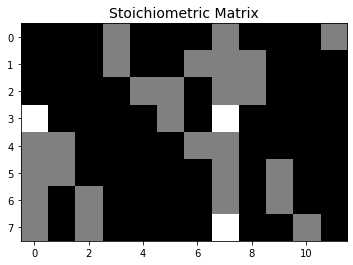

r0 :  CO(g)  + S     <=> CO(s)
r1 :  CO(s)  + S     <=> C(s)   + O(s)
r2 :  O(s)   + H2(g) <=> H2O(g) + S
r3 :  H2(g)  + 2 S   <=> 2 H(s)
r4 :  C(s)   + H(s)  <=> CH(s)  + S
r5 :  CH(s)  + H(s)  <=> CH2(s) + S
r6 :  CH2(s) + H(s)  <=> CH3(s) + S
r7 :  CH3(s) + H(s)  <=> CH4(g) + 2 S
n_reactions = 8


In [21]:
'''4.1) Code for stoichiometric matrix'''

import io

# open file in reading mode 'r' (default), text 't' (default)
finput = open('data/methane-catalyst-rxn.txt','rt')
reactions = list()

for line in finput:
    stripped_line = line.strip()
    if stripped_line[0] == '#': continue
    if stripped_line[:2] == '..': continue
        
    reactions.append( stripped_line.split(':')[0] )
    
finput.close()
    

import numpy as np

species_tmp = list()  # temporary list for species

for r in reactions:
    
    left  = r.split('<=>')[0].strip()
    right = r.split('<=>')[1].strip()
    
    left_terms  = left.split('+')
    right_terms = right.split('+')
    
    terms = [ t.strip() for t in left_terms ] + [ t.strip() for t in right_terms ] # list comprehensions
    
    for i in terms:
        
        tmp = i.split(' ') # split stoichiometric coefficient from species name
        
        assert len(tmp)==1 or len(tmp)==2,' terms = %r, i = %r, tmp = %r '%(terms,i,tmp)
        
        if len(tmp) == 2:
            species_tmp.append( tmp[1].strip() ) # species name if there is a stoichiometric coeff.
        else:
            species_tmp.append( i.strip() ) # species name if there is no stoichiometric coeff.

species_filtered = set(species_tmp) # filter species as a set

species = list( species_filtered )  # convert species set to list 


s_mtrx = np.zeros( (len(reactions),len(species)) )

for r in reactions:
    
    i_row = reactions.index(r)  # reaction index
    
    left  = r.split('<=>')[0].strip()
    right = r.split('<=>')[1].strip()
    left_terms = left.split('+')
    left_terms = [t.strip() for t in left_terms] # in-place clean up
    right_terms = right.split('+')
    right_terms = [t.strip() for t in right_terms] # in-place clean up
    
    for t in left_terms: # reactants
        
        tmp = t.split(' ') # split stoichiometric coeff and species name
        
        if len(tmp) == 2: # stoich coeff and species name
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member) # find id of species in the species list
            
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = -1.0 * coeff
            
        else: # only species name
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = -1.0

    for t in right_terms: # products
        
        tmp = t.split(' ')
        
        if len(tmp) == 2:
            coeff = float(tmp[0].strip())
            species_member = tmp[1].strip()
            j_col = species.index(species_member)
            
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            
            s_mtrx[i_row,j_col] = 1.0 * coeff
        else:
            species_member = tmp[0].strip()
            j_col = species.index(species_member)
            assert s_mtrx[i_row,j_col] == 0.0, \
                   'duplicates not allowed r%r: %r %r r'%\
                   (i_row,r,species_member,s_mtrx[i_row,j_col])
            s_mtrx[i_row,j_col] = 1.0

print('stoich_mtrx =\n',s_mtrx)


from chen_3170.help import plot_matrix
plot_matrix(s_mtrx, title='Stoichiometric Matrix')

from chen_3170.help import print_reactions

print_reactions( reactions )

In [55]:
'''4.1) Code for computing rank(S)'''
rank = np.linalg.matrix_rank(s_mtrx)
print('Rank =', rank)

Rank = 8


**Explanation:** This is an underdetermined matrix. Here, the rank is equal to the number of rows of the matrix. If we were to solve, the solution would be dependent on "b vector" used.

### <span style="color:blue">[4.2)](#toa) Build the matrix $\Smtrx\Smtrx^\top$. Build a random production rate density vector, $\gvec$, with values varying from -2.1 to 1.7 [mol/(s cc)]. Compute the solution of the problem:
</span>
<br>
<span style="color:blue">
\begin{equation*}
    \Smtrx\Smtrx^\top\,\rvec = \Smtrx\,\gvec ,
\end{equation*}
</span>    

### <span style="color:blue">and show which reactions are effectively going forward and which reactions are effectively goind backward. Is the solution unique despite the fact that $\gvec$ is a random vector? Explain.</span><a id="a42"></a>

In [59]:
'''Code for random g vector with values between -2.1 to 1.7'''
matrix=s_mtrx@s_mtrx.transpose()
print(matrix)

import random
g_vec = random.sample(range(-2.1, 1.7), 8)
print(g_vec)

[[ 3.  0. -1.  2. -1. -1. -1. -2.]
 [ 0.  4. -2.  2. -2. -1. -1. -2.]
 [-1. -2.  4. -1.  1.  1.  1.  2.]
 [ 2.  2. -1.  9. -4. -4. -4. -6.]
 [-1. -2.  1. -4.  4.  1.  2.  3.]
 [-1. -1.  1. -4.  1.  4.  1.  3.]
 [-1. -1.  1. -4.  2.  1.  4.  2.]
 [-2. -2.  2. -6.  3.  3.  2.  7.]]


TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
'''Code to solve for r vector'''


In [ ]:
'''Code for forward and backward reaction rates'''


**Explanation:**

## <span style="color:blue">[Assignment 5 (5 pts)](#toa)</span><a id="a5"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>